**Brief description of the data set and a summary of its attributes.**

**Answer:** We will be using the housing dataset for this assignment. This is a well-known data set and I downloaded it from Kaggle (https://www.kaggle.com/mohamedbakrey/housecsv). The data file is in CSV format. The data has 18 columns (features) and 1000 rows (examples). Different features have different ranges. The target "price" depends on the values of all other features. Some necessary information about some of the important features are given below:

Feature Name  | Data Type | Value Range| Missing value|
--------------|-----------|------------|--------------|
#bedrooms     | Real      |[0,7]       |    Yes
#bathrooms    | Real      |[0,5]       |    Yes
#sqft_living  | Real      |[380, 6070] |    Yes
#sqft_lot     | Real      |[649, 315k] |    Yes
#floors       | Real      |[1,3.5]     |    Yes
#waterfront   | Real      |[0,1]       |    Yes
#view         | Real      |[0,4]       |    Yes
#condition    | Real      |[1,5]       |    Yes
#grad         | Real      |[4,12]      |    Yes
#sqft_above   | Real      |[380, 6070] |    Yes

**Initial plan for data exploration**

**Answer:** The initial plan for data exploration is as follows:
- Read the data from the CSV file and store them in a pandas DataFrame.
- Check the first few examples (rows) from the DataFrame to get an idea about the data and whether the data make sense or not.
- Check the number of examples, name of all features including the target variable, and their data type format. 
- Check whether data have any duplicate value, missing value.
- Check the mean, 25%, median, 75%, and range of all features.
- Check the relation of the target variable with other features.
- Check the distribution of the target variable.

The next few blocks of codes performed some of the functions discussed above.  

In [ ]:
#install all packages
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#read data from csv file and show first five examples
filepath='Data/houses.csv'
data=pd.read_csv(filepath)
df=data
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [ ]:
#print the number of rows
print(df.shape[0])
#print the name of the features including target
print(df.columns.to_list())
#print the datatype of each column
print(df.dtypes)

1000
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'price']
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
price            float64
dtype: object


In [ ]:
#Check the description of the data
statas_df=df.describe()
statas_df.loc['range']=statas_df.loc['max']-statas_df.loc['min']
out_fields=['mean','25%','50%','75%','range']
statas_df=statas_df.loc[out_fields]
statas_df.rename({'50%':'median'},inplace=True)
print(statas_df)

        bedrooms  bathrooms  sqft_living  ...        long  sqft_living15       price
mean    3.349349   2.045796  2051.397397  ... -122.207406    1986.813814   52.071452
25%     3.000000   1.500000  1405.000000  ... -122.322500    1490.000000   30.980000
median  3.000000   2.000000  1900.000000  ... -122.218000    1850.000000   43.500000
75%     4.000000   2.500000  2475.000000  ... -122.118000    2360.000000   63.446250
range   7.000000   5.000000  5690.000000  ...    0.781000    3930.000000  300.000000

[5 rows x 18 columns]


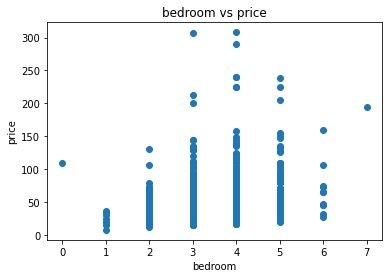

In [ ]:
#Check the relation between target (price) with a feature(#bedroom) 
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.axes()
ax.scatter(x='bedrooms',y='price',data=df)
ax.set(xlabel='bedroom',
       ylabel='price',
       title='bedroom vs price');

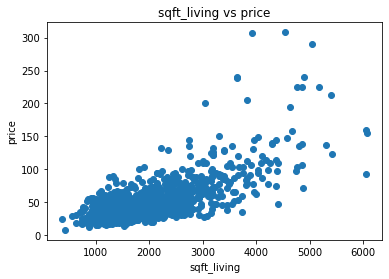

In [ ]:
#Check the relation between target (price) with a feature(#sqft_living) 
ax=plt.axes()
ax.scatter(x='sqft_living',y='price',data=df)
ax.set(xlabel='sqft_living',
       ylabel='price',
       title='sqft_living vs price');

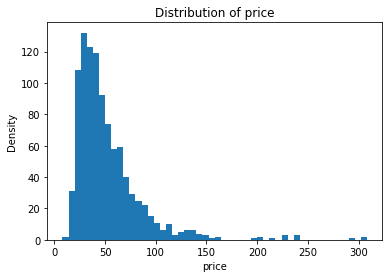

In [ ]:
#Distribution of the target variable (price)
ax=plt.axes()
ax.hist(df.price,bins=50)
ax.set(xlabel='price',
       ylabel='Density',
       title='Distribution of price');

**Actions taken for data cleaning and feature engineering**

**Answer:** Model decisions and analytics are driven by data and models. Messy data can lead to "garbage-in, garbage-out" effect, and produces unreliable outcomes. To handle the messy data we need to be clean the data. Here are some of the steps for data cleaning:
- Check the duplicate and unnecessary data. Filter the data and remove unnecessary data.
- Correct the inconsistent text and typos in the data.
- Handle the missing data. Remove the missing data which may lead to losing information. In this case, we can impute data by replacing mean or median or mask the data by creating a category.
- Handle the outlier data. We can detect the outlier by histogram, boxplot, or even by residual. We can either remove them, replace them with some other data or transform them. In some case, outlier data may hold useful information and we should keep as it is.

Here is the summary of steps that I take for feature engineering:
 - Variable selections: It includes choosing the set of features to add to the model. There may have some variables that do not have any relation or little relation with the target variable.
 - Encode the variable: It is related to converting the non-numerical feature to a numerical feature. For nominal data, we can use binary encoding or one-hot encoding and ordinal encoding for ordinal data.
 - Scaling: Convert the scale of all numerical features so that they are comparable. Here, we may use Standard-scaling, Min-max scaling, or Robust scaling. 
 - In some models, features need to be normally distributed. In this case, we can calculate the skewness of each feature. We can then remove the skewness by the following functions: log, log1p, square-root, or box-cox. We can use a hypothesis test to check the normality of the feature value.
 - In some cases, we may need the polynomial features. In this case, we can convert the feature to a higher-order polynomial.
 - Some of the features may have multicollinearity. For some of the models, it is not a big issue and for some other model, it may affect the model performance. 

The next few blocks of codes performed some of the functions mentioned above.  

In [ ]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [ ]:
#Check the null value in the data
df.isnull().sum().sort_values()

bedrooms         1
long             1
lat              1
zipcode          1
yr_renovated     1
yr_built         1
sqft_basement    1
sqft_above       1
grade            1
condition        1
view             1
waterfront       1
floors           1
sqft_lot         1
sqft_living      1
bathrooms        1
sqft_living15    1
price            1
dtype: int64

In [ ]:
#replace the null value by zero
df=df.fillna(0)
df.isnull().sum().sort_values()

bedrooms         0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
sqft_living15    0
price            0
dtype: int64

In [ ]:
#Choose the numeric column in the data set.
#There is no non-neumarical column
df.select_dtypes('number').columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'price'],
      dtype='object')

In [ ]:
#remove some column that may not related to taget variable
df=df.drop(['zipcode','lat','long'], axis=1)

In [ ]:
#Calculate the skewness of each feature
num_columns=df.select_dtypes('number').columns
skew_limit=0.75
skew_vals=data[num_columns].skew()
print(skew_vals)

bedrooms          0.354236
bathrooms         0.308664
sqft_living       1.247206
sqft_lot          6.080851
floors            0.686188
waterfront       11.056675
view              3.329668
condition         0.835348
grade             0.830892
sqft_above        1.479036
sqft_basement     1.471452
yr_built         -0.544767
yr_renovated      4.634440
sqft_living15     1.049913
price             2.974934
dtype: float64


In [ ]:
#sort the feature based on their skewnwss value
skew_cols=skew_vals[abs(skew_vals>0.75)].sort_values(ascending=False)
skew_cols

waterfront       11.056675
sqft_lot          6.080851
yr_renovated      4.634440
view              3.329668
price             2.974934
sqft_above        1.479036
sqft_basement     1.471452
sqft_living       1.247206
sqft_living15     1.049913
condition         0.835348
grade             0.830892
dtype: float64

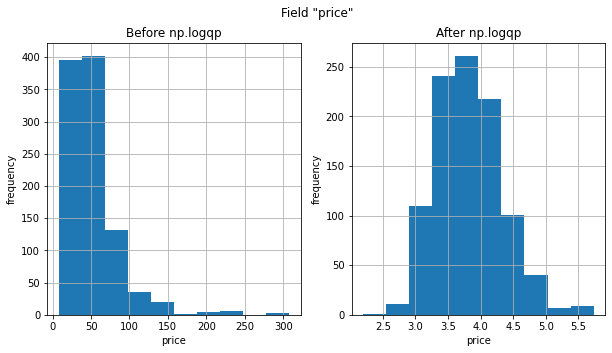

In [ ]:
#Remove skewnwss by of target variable by log1p
field='price'
fig, (ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))
df[field].hist(ax=ax_before)

df[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='Before np.logqp',xlabel='price',ylabel='frequency')
ax_after.set(title='After np.logqp',xlabel='price',ylabel='frequency')

fig.suptitle('Field "{}"'.format(field));

In [ ]:
#Remove the skewess of all feature
for col in skew_cols.index.values:
  if col=='price':
    continue
  data[col]=data[col].apply(np.log1p)

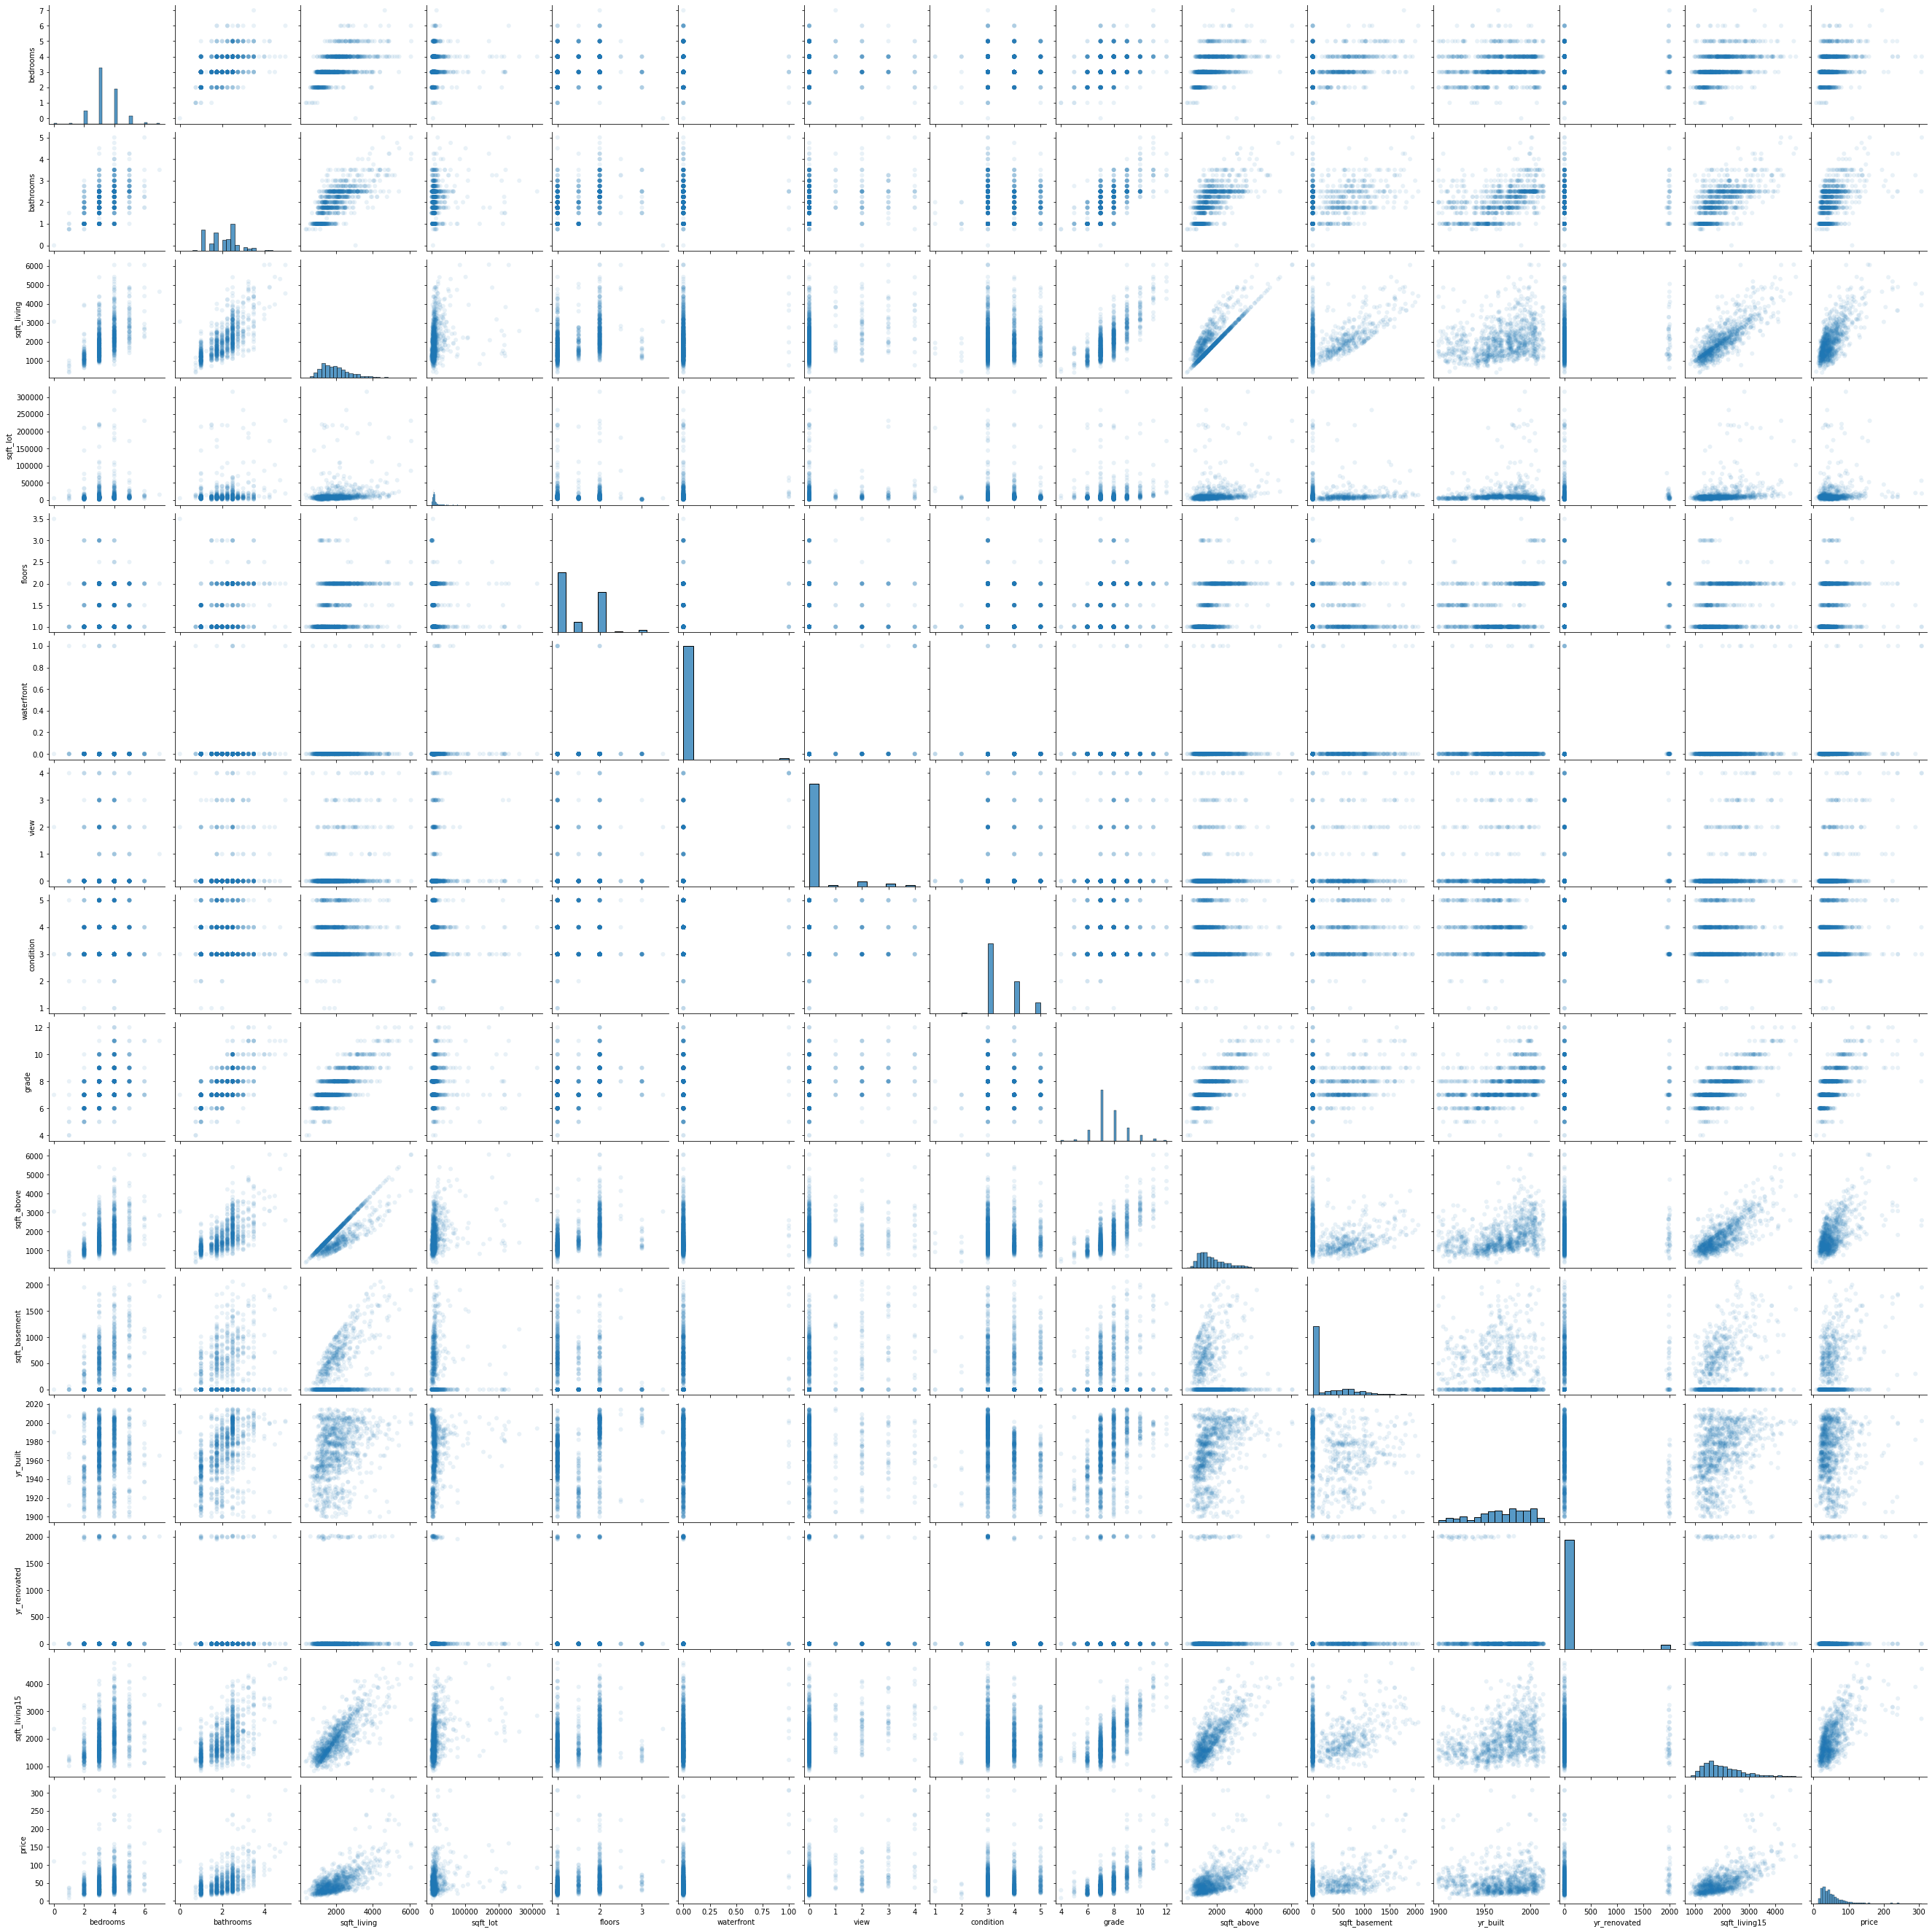

In [ ]:
#Visulized the multicollinearity of the features
sns.pairplot(df,plot_kws=dict(alpha=0.1,edgecolor='none'))

**Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner**

**Answe:** Here are a list of key finding and the insight of the data set.
- Our data set has one target variable and 17 non-target variables (features). All the features have numerical value. However, different feature has a different range. We can normalize the data and can bring them in the range [0,1].
- The data set has one missing row where all feature values are missed. We may drop the row. Here, I replace the missing value with the average value of each feature.
- There is some skewness in some of the features of the data set. I remove the skewness of those features whose value is higher than 0.75 and then check the normality.
- Calculate the relation of different features with the target variable. Also, calculate the co-relation among the features. Some of the features have linear co-relation, others features' relations are not completely linear.  

**Formulating at least 3 hypothesis about this data**

**Answer:** A hypothesis is a statement about the population parameters. Here I formulate four hypotheses and their alternative hypothesis:
- H0: The earlier built date of the house has co-relation with house price, H1: The earlier built date of the house does not have any co-relation with house price.
- H0: The average number of bedrooms at each house = 3.0, H1: The average number of bedrooms at each house <> 3.0.
- H0: The average number of the bathroom at this house <=2.0, H1: The average number of the bathroom at this house > 2.0.
- H0: The average number of the floor at each house <2.0, H1: The average number of the floor at each house >=2.0.



**Conducting a formal significance test for one of the hypotheses and discuss the results** 

**Answer:** In this section, we test the first hypothesis to estimate the co-relation among house prices and their built data. We use the Pearson correlation coefficient to measure the correlation. Pearson correlation coefficient measures the linear relationship between two the dataset of variables. However, it requires that each data set need to be normally distributed. Like other correlation coefficients, the output range of p will be -1 to +1. Here, -1 or +1 means a linear relationship, and 0 means no relationship. Positive co-relation means independent variable x increase so does dependent variable y and vice-versa.
In the experiment shows below, both the feature value of "yr_built" and "price" are transformed to normal. We then check the co-relation. For two-tail we have a 2-tailed p-value. They have less linear relation (the same things shows in the figure above where we visualised the multicollinearity of the features).

In [ ]:
#estimate the Pearson correlation coefficient
from scipy import stats
X = data['yr_built'].array
Y = data['price'].array
result = stats.pearsonr(X,Y)
print(result)

(0.05099854082875572, 0.10701694651892892)


**Suggestions for next steps in analyzing this data**

**Answer:** Here is the list of suggestions for the next steps in analyzing the data.
- Fix the structural error if necessary. For example, rename the feature, take the 2 digit value after the decimal place.
- Creating a new feature by combining two or more features.

- Reduce the dimension of the data if there are too many features.

- Over-sample the data if there are not sufficient data to train a model. There are different approaches to oversampled the data where SMOTE is one of them. 


**A paragraph that summarizes the quality of this data set and a request for additional data if needed**

**Answer:** The quality of this housing data set is good enough. There is no structural issue in this data set. This data set requires less effort to clean. There is only one row that has missing values. Moreover, all features have numeric value. So, we do not need to encode them. We just normalized the data and remove the skewness from the data. However, all the features in this data set are not linearly correlated with the target and it may have some feature that has little impact on target variable. 

The data set has 999 examples which are fair enough to train a linear regression model.  